In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv(r'C:\Users\Danie\Downloads\StockMarketData(S&P500).csv')
df['date'] = pd.to_datetime(df['date'])

In [26]:
#Looking at the Data

df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [7]:
# Checking for Missing Data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

symbol - 0.0%
date - 0.0%
open - 2.2111797246880227e-05%
high - 1.6081307088640165e-05%
low - 1.6081307088640165e-05%
close - 0.0%
volume - 0.0%


In [9]:
# Data Types
df.dtypes

symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [10]:
# Round all numeric values in the DataFrame to 2 decimal places
df = df.round(2)

In [11]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,1/2/2014,25.07,25.82,25.06,25.36,8998943
1,AAPL,1/2/2014,79.38,79.58,78.86,79.02,58791957
2,AAP,1/2/2014,110.36,111.88,109.29,109.74,542711
3,ABBV,1/2/2014,52.12,52.33,51.52,51.98,4569061
4,ABC,1/2/2014,70.11,70.23,69.48,69.89,1148391


In [14]:
#Handling Nulls & Duplicates

df.isnull().sum()


symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [17]:
#Checking for Duplicates

df.duplicated().sum() 
df = df.drop_duplicates()
def check_duplicates(df):
    return df.duplicated().sum()

count = check_duplicates(df)
print(count)


0


In [28]:
# Pivot to get symbols as columns and dates as index (use 'close' prices)
pivot_df = df.pivot(index='date', columns='symbol', values='close')

# Sort by date
pivot_df = pivot_df.sort_index()

pivot_df.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,56.21,25.360,109.74,79.0185,51.98,69.89,38.23,81.13,59.29,49.28,...,31.25,45.97,99.75,47.96,47.64,34.16,75.09,92.24,29.65,32.36
2014-01-03,56.92,26.540,112.88,77.2828,52.30,69.94,38.64,81.40,59.16,49.61,...,30.81,45.62,99.51,48.19,47.96,34.47,75.56,92.64,29.86,32.05
2014-01-06,56.64,27.030,111.80,77.7042,50.39,69.69,39.15,80.54,58.12,49.33,...,30.37,45.42,99.66,47.90,48.36,34.41,75.50,93.24,29.65,31.98
2014-01-07,57.45,26.905,113.18,77.1481,50.49,70.45,38.85,81.52,58.97,49.59,...,30.37,45.52,101.07,48.64,48.76,34.51,76.56,95.10,29.74,32.10
2014-01-08,58.39,27.630,112.30,77.6371,50.36,71.14,39.20,82.15,58.90,49.71,...,30.39,45.91,100.74,48.73,48.32,34.49,76.53,97.43,30.00,31.74


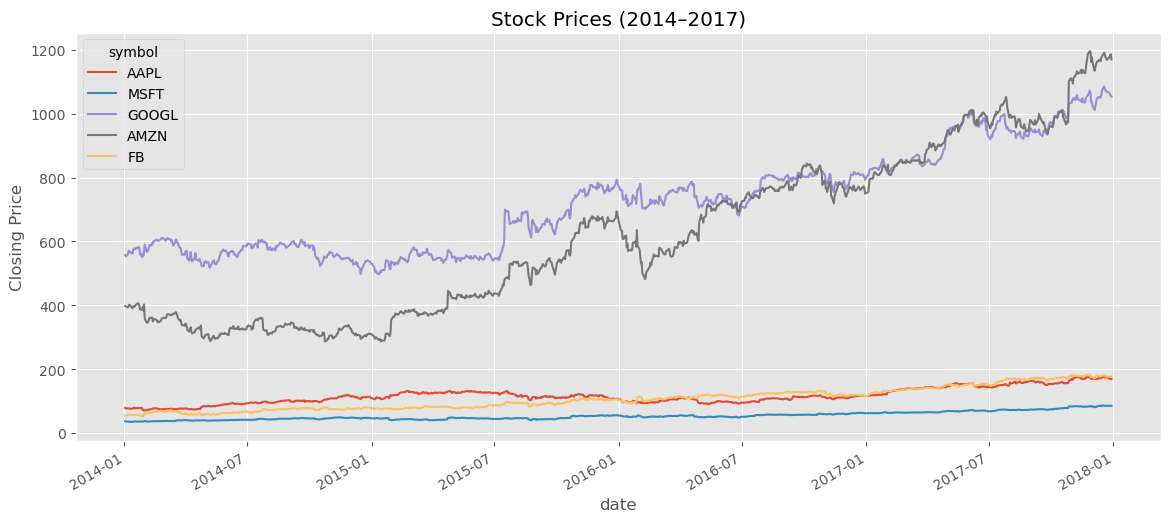

In [38]:
# Visualizing the Closing Prices of Multiple Stocks
selected = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']
pivot_df[selected].plot(figsize=(14, 6), title='Stock Prices (2014–2017)')
plt.ylabel('Closing Price')
plt.show()

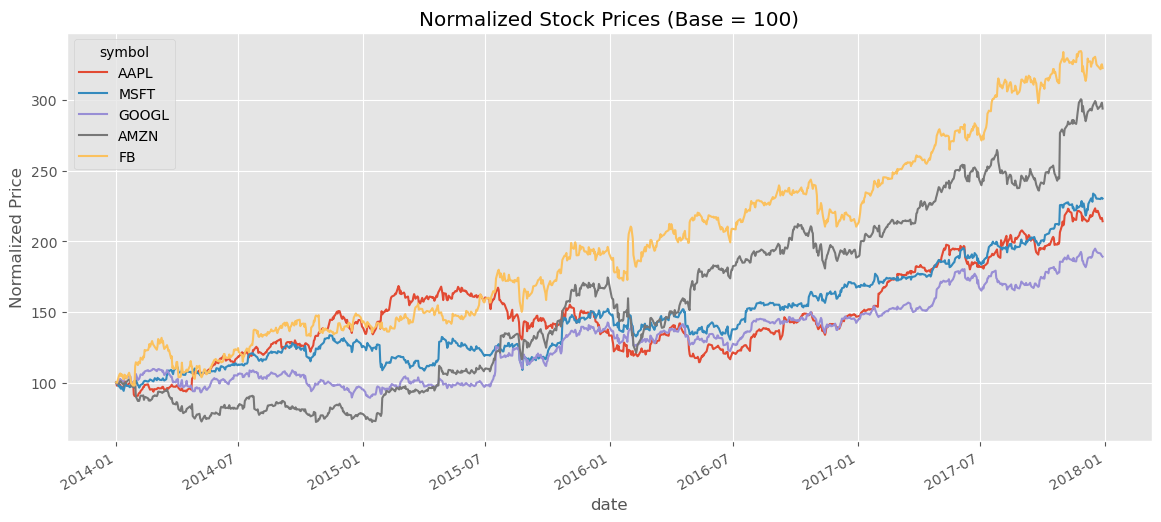

In [39]:
#Normalize Prices to Compare Growth
normalized = pivot_df[selected] / pivot_df[selected].iloc[0] * 100
normalized.plot(figsize=(14, 6), title='Normalized Stock Prices (Base = 100)')
plt.ylabel('Normalized Price')
plt.show()

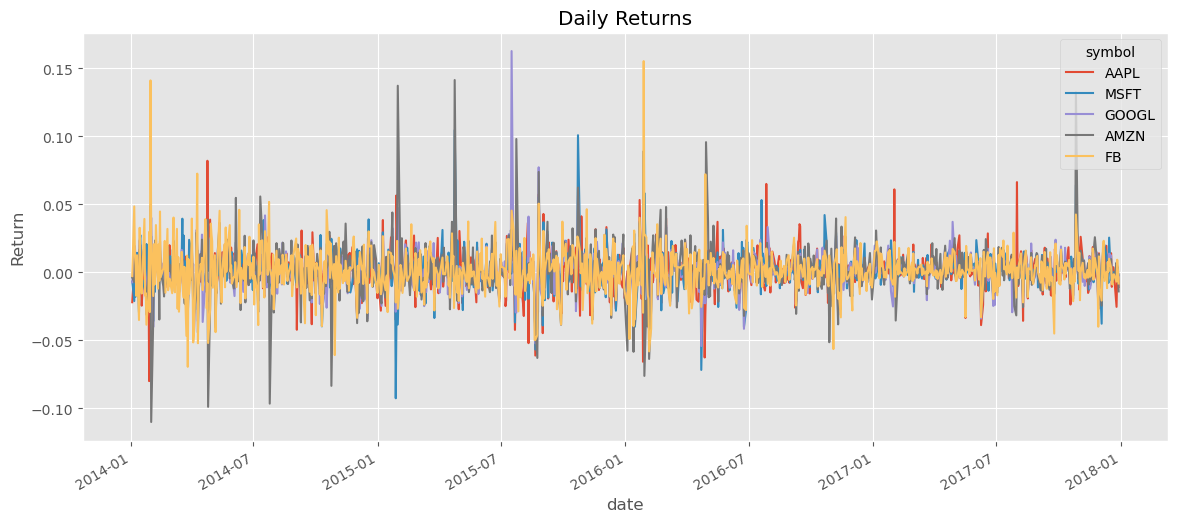

In [51]:
#Calculating the Daily Returns
returns = pivot_df.pct_change(fill_method=None)
returns[selected].plot(figsize=(14, 6), title='Daily Returns')
plt.ylabel('Return')
plt.show()

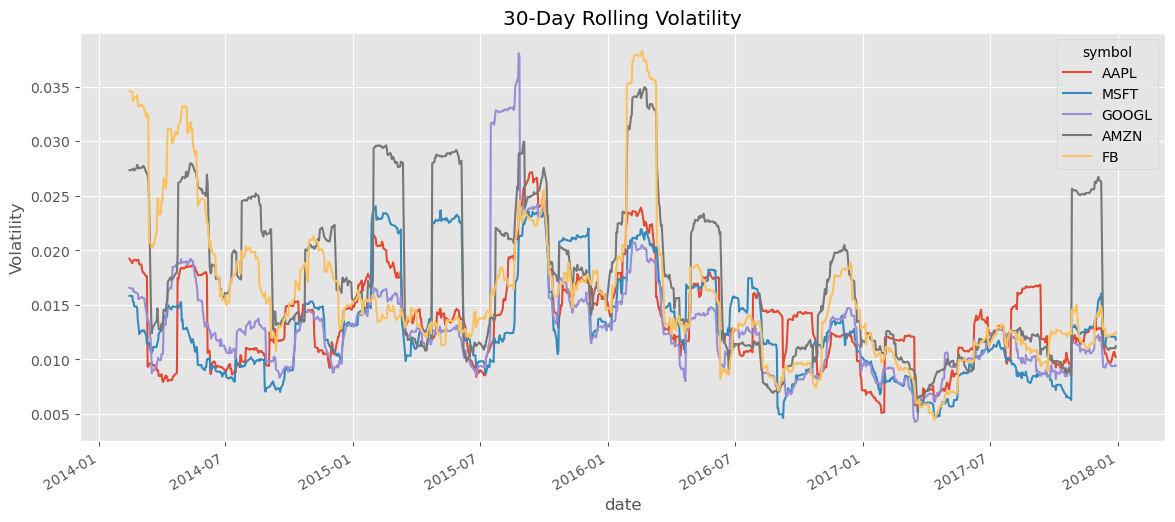

In [41]:
#Comparing Volatility Across Stocks
volatility = returns.rolling(window=30).std()

# Plot for selected stocks
volatility[selected].plot(figsize=(14, 6), title='30-Day Rolling Volatility')
plt.ylabel('Volatility')
plt.show()

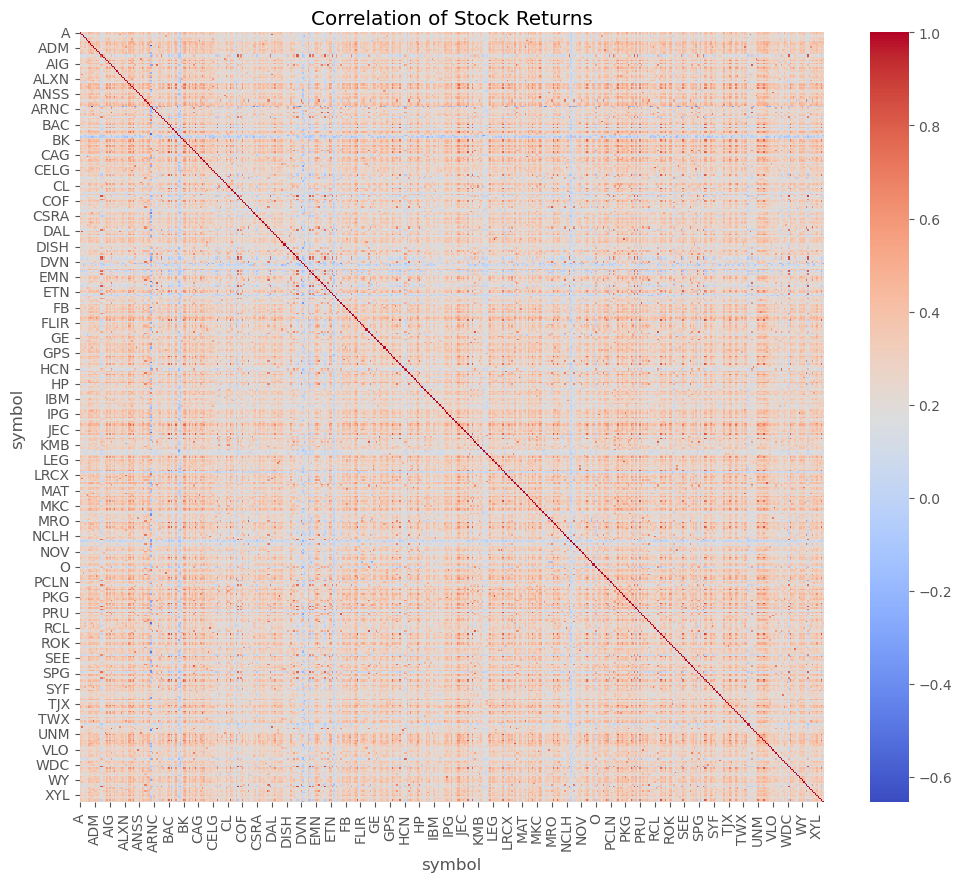

In [43]:
#Correlation Between Stocks

corr_matrix = returns.corr()

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation of Stock Returns')
plt.show()

In [46]:
#Performers
total_return = (pivot_df.iloc[-1] / pivot_df.iloc[0] - 1) * 100
top_performers = total_return.sort_values(ascending=False).head(10)
bottom_performers = total_return.sort_values().head(10)

print("Top 10 performers:")
print(top_performers)

print("\nBottom 10 performers:")
print(bottom_performers)

Top 10 performers:
symbol
NVDA    1120.050441
AVGO     387.939221
EA       360.183968
ALGN     290.080758
NFLX     270.354650
ATVI     250.415053
LUV      246.663136
SWKS     246.532847
EW       241.959951
CNC      241.734417
dtype: float64

Bottom 10 performers:
symbol
CHK     -85.123967
RRC     -79.128945
DISCA   -74.882155
DISCK   -74.345613
MAT     -67.545896
VIAB    -64.565842
TRIP    -57.181909
NBL     -56.239676
NOV     -54.416603
M       -52.818880
dtype: float64


In [47]:
returns = returns.reset_index()
returns['day_of_week'] = returns['date'].dt.day_name()

# Average return by weekday across all stocks
# Exclude the date column when calculating the mean
numeric_columns = returns.select_dtypes(include=['number']).columns
weekday_avg = returns.groupby('day_of_week')[numeric_columns].mean().mean(axis=1).sort_values()
print(weekday_avg)

day_of_week
Monday       0.987854
Tuesday      0.990628
Thursday     0.994298
Wednesday    0.996800
Friday       1.002594
dtype: float64


<Axes: title={'center': 'Average S&P 500 Stock Price (Synthetic Index)'}, xlabel='date'>

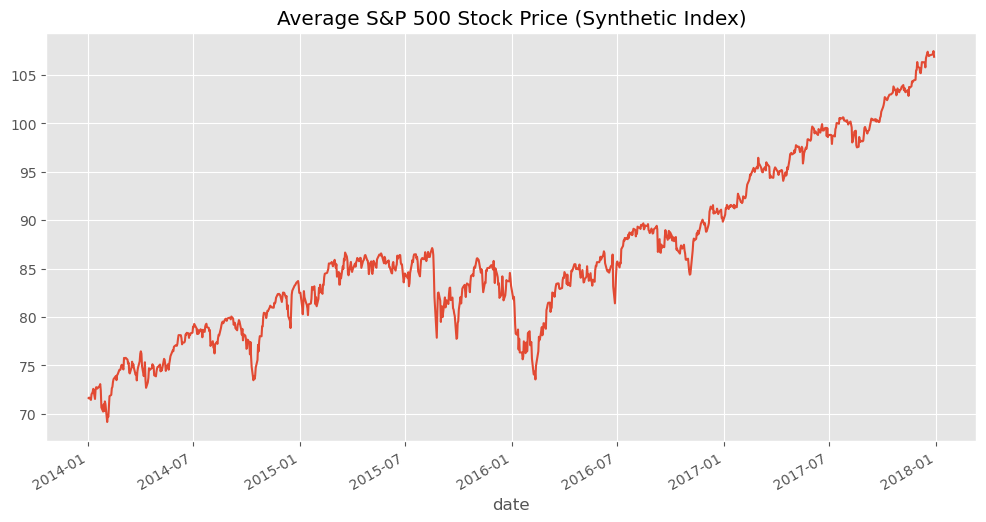

In [49]:
#Creating a Synthetic Index
synthetic_index = pivot_df.mean(axis=1)
synthetic_index.plot(title='Average S&P 500 Stock Price (Synthetic Index)', figsize=(12, 6))
